In [1]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import datetime
import time
import talib
from talib import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import xgboost as xgb
import math
import numpy as np
from sklearn.decomposition import PCA
import pickle
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
yf.pdr_override()

In [2]:
def add_indicators():
        
    upper_band, mid_band, lower_band = BBANDS(df['Adj Close'],timeperiod=really_fast, nbdevup=2, nbdevdn=2, matype=0)
    d_ema = DEMA(df['Adj Close'], timeperiod=really_fast)
    E_M_A = EMA(df['Adj Close'], timeperiod=fast)
    ht_trend = HT_TRENDLINE(df['Adj Close'])
    kama = KAMA(df['Adj Close'], timeperiod=fast)
    ma = MA(df['Adj Close'], timeperiod=fast, matype=0)
    #mama, fama = MAMA(df['Adj Close'], fastlimit=really_fast, slowlimit=slow) < this gave me issues?
    #mavp = MAVP(df['Adj Close'])
    mid = MIDPOINT(df['Adj Close'], timeperiod=fast)
    mid_price = MIDPRICE(df['High'], df['Low'], timeperiod=fast)
    sar = SAR(df['High'], df['Low'], acceleration=.02, maximum=.2)
    sarext = SAREXT(df['High'], df['Low'], startvalue=0, offsetonreverse=0, accelerationinitlong=.02, accelerationlong=.02, accelerationmaxlong=.2, accelerationinitshort=.02, accelerationshort=.02, accelerationmaxshort=.2)
    sma = SMA(df['Adj Close'], timeperiod=slow)
    tema = TEMA(df['Adj Close'], timeperiod=slow)
    trima = TRIMA(df['Adj Close'], timeperiod=slow)
    wma = WMA(df['Adj Close'], timeperiod=slow)

    #this is some of the beginning stuff

    O_B_V = OBV(df['Adj Close'], df['Volume'])
    A_D_O_S_C = ADOSC(df['High'], df['Low'], df['Adj Close'], df['Volume'], fastperiod=fast, slowperiod=slow)
    O_G_chaikin = AD(df['High'], df['Low'], df['Adj Close'], df['Volume'])
    HT_DCper = HT_DCPERIOD(df['Adj Close'])
    HT_DCphase = HT_DCPHASE(df['Adj Close'])
    inphase, quad = HT_PHASOR(df['Adj Close'])
    r_sin, leadsin = HT_SINE(df['Adj Close'])

    #volatility
    atr = ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)
    natr = NATR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)
    t_range = TRANGE(df['High'], df['Low'], df['Adj Close'])

    #below here are momentum ind

    adx = ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    adxr = ADXR(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    apo = APO(df['Adj Close'], fastperiod=really_fast, slowperiod=fast, matype=0)
    aroon_d, aroon_u = AROON(df['High'], df['Low'], timeperiod=fast)
    aroon_osc = AROONOSC(df['High'], df['Low'], timeperiod=fast)
    bop = BOP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    cci = CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    cmo = CMO(df['Adj Close'], timeperiod=fast)
    dx = DX(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    macd, macdsig, macdhist = MACD(df['Adj Close'], fastperiod=fast, slowperiod=slow, signalperiod=really_fast)
    macdex, macdexsig, macdexhist = MACDEXT(df['Adj Close'], fastperiod=fast, fastmatype=0, slowperiod=slow, slowmatype=0, signalperiod=really_fast, signalmatype=0)
    macdfixd, macdfixdsig, macdfixdhist = MACDFIX(df['Adj Close'], signalperiod=really_fast)
    # more momo's

    mfi = MFI(df['High'], df['Low'], df['Adj Close'],df['Volume'],timeperiod=fast)
    min_di = MINUS_DI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    min_dm = MINUS_DM(df['High'], df['Low'], timeperiod=fast)
    momo = MOM(df['Adj Close'], timeperiod=really_fast)
    plus_di = PLUS_DI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    plus_dm = PLUS_DM(df['High'], df['Low'], timeperiod=fast)
    ppo = PPO(df['Adj Close'], fastperiod=really_fast, slowperiod=fast, matype=0)
    roc = ROC(df['Adj Close'], timeperiod=fast)
    rocp = ROCP(df['Adj Close'], timeperiod=fast)
    rocr = ROCR(df['Adj Close'], timeperiod=fast)
    rocr_hund = ROCR100(df['Adj Close'], timeperiod = fast)
    rsi_fastk, rsi_fastd = STOCHRSI(df['Adj Close'], timeperiod=fast, fastk_period=slow, fastd_period=really_fast, fastd_matype=0)
    trix = TRIX(df['Adj Close'], timeperiod=slow)
    ult_osc = ULTOSC(df['High'], df['Low'], df['Adj Close'], timeperiod1=really_fast, timeperiod2=fast, timeperiod3=slow)


    #old some of the first added
    R_S_I = RSI(df['Adj Close'], timeperiod=slow)
    slowk, slowd = STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, slowk_period=slow, slowk_matype=0, slowd_period=slow, slowd_matype=0)
    fastk, fastd = STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, fastd_period=really_fast, fastd_matype=0)

    real = WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)

    # below are the TA indicators

    two_crows = CDL2CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_crows = CDL3BLACKCROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_inside = CDL3INSIDE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_line = CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_out = CDL3OUTSIDE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_stars = CDL3STARSINSOUTH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_soldier = CDL3WHITESOLDIERS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    baby = CDLABANDONEDBABY(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    adv = CDLADVANCEBLOCK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    belt_hold = CDLBELTHOLD(df['Open'], df['High'], df['Low'], df['Adj Close'])
    breakaway = CDLBREAKAWAY(df['Open'], df['High'], df['Low'], df['Adj Close'])
    closingmara = CDLCLOSINGMARUBOZU(df['Open'], df['High'], df['Low'], df['Adj Close'])
    baby_swallow = CDLCONCEALBABYSWALL(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    counter = CDLCOUNTERATTACK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    dark_cloud = CDLDARKCLOUDCOVER(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    doji = CDLDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    doji_star = CDLDOJISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    dragon_doji = CDLDRAGONFLYDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    engulf = CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    evening_star = CDLEVENINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    gapside = CDLGAPSIDESIDEWHITE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    gravestone = CDLGRAVESTONEDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hammer = CDLHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hang_man = CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Adj Close'])
    harami = CDLHARAMI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    harami_cross = CDLHARAMICROSS(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    high_wave = CDLHIGHWAVE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hikkake = CDLHIKKAKE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hikkake_mod = CDLHIKKAKEMOD(df['Open'], df['High'], df['Low'], df['Adj Close'])
    pidgeon = CDLHOMINGPIGEON(df['Open'], df['High'], df['Low'], df['Adj Close'])
    id_three_crows = CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    in_neck = CDLINNECK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    inv_hammer = CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    kicking = CDLKICKING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    kicking_len = CDLKICKINGBYLENGTH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    ladder_bot = CDLLADDERBOTTOM(df['Open'], df['High'], df['Low'], df['Adj Close'])
    doji_long = CDLLONGLEGGEDDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    long_line = CDLLONGLINE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    marabozu = CDLMARUBOZU(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    match_glow = CDLMATCHINGLOW(df['Open'], df['High'], df['Low'], df['Adj Close'])
    mat_hold = CDLMATHOLD(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    morning_doji = CDLMORNINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    morning_star = CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    on_neck = CDLONNECK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    pierce = CDLPIERCING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    rickshaw = CDLRICKSHAWMAN(df['Open'], df['High'], df['Low'], df['Adj Close'])
    rise_fall = CDLRISEFALL3METHODS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    sep_line = CDLSEPARATINGLINES(df['Open'], df['High'], df['Low'], df['Adj Close'])
    shooting_star = CDLSHOOTINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    sl_candle = CDLSHORTLINE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    spin_top = CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    stalled = CDLSTALLEDPATTERN(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    stick_sand = CDLSTICKSANDWICH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    takuri = CDLTAKURI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    tasuki_gap = CDLTASUKIGAP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    thrust = CDLTHRUSTING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    tristar = CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_river = CDLUNIQUE3RIVER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    ud_two_gap = CDLUPSIDEGAP2CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    down_three_gap = CDLXSIDEGAP3METHODS(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #76 vars

    #are_all_zero = (test_TA == 0).all()
    #true if all values are 0
    #false if contain a non 0'''

    df.drop(['Close'], axis =1, inplace = True)

    df['upper_band'] = upper_band
    df['lower_band'] = lower_band
    df['mid_band'] = mid_band
    df['d_ema'] = d_ema
    df['ht_trend'] = ht_trend
    df['kama'] = kama
    df['ma'] = ma
    #df['mama'] = mama
    df['mid'] = mid
    df['mid_price'] = mid_price

    df['sar'] = sar
    df['sarext'] = sarext
    df['sma'] = sma
    df['tema'] = tema
    df['trima'] = trima
    df['wma'] = wma
    #df['fama'] = fama

    df['EMA'] = E_M_A
    df['SlowK'] = slowk
    df['SlowD'] = slowd
    df['R_S_I'] = R_S_I
    df['FastK'] = fastk
    df['FastD'] = fastd
    df['WilliamsR'] = real

    df['atr'] = atr
    df['natr'] = natr
    df['t_range'] = t_range


    #df['na_tr'] = natr

    df['OBV'] = O_B_V
    df['ADOSC'] = A_D_O_S_C
    df['ogchaikin'] = O_G_chaikin
    df['HTDCperiod'] = HT_DCper
    df['HTDCphase'] = HT_DCphase
    df['inphase'] = inphase
    df['quad'] = quad
    df['rsin'] = r_sin
    df['leadsin'] = leadsin

    df['mfi'] = mfi
    df['min_di'] = min_di
    df['min_dm'] = min_dm
    df['momo'] = momo
    df['plus_di'] = plus_di
    df['plus_dm'] = plus_dm
    df['ppo'] = ppo
    df['roc'] = roc
    df['rocp'] = rocp

    df['rocr'] = rocr
    df['rocr_hund'] = rocr_hund
    df['rsi_fastk'] = rsi_fastk
    df['rsi_fastd'] = rsi_fastd
    df['trix'] = trix
    df['ult_osc'] = ult_osc

    df['adx'] = adx
    df['adxr'] = adxr
    df['apo'] = apo
    df['aroon_d'] = aroon_d
    df['aroon_u'] = aroon_u
    df['aroon_osc'] = aroon_osc
    df['bop'] = bop
    df['cci'] = cci
    df['cmo'] = cmo

    df['dx'] = dx
    df['macd'] = macd
    df['macdsig'] = macdsig
    df['macdhist'] = macdhist
    df['macdex'] = macdex
    df['macdexsig'] = macdexsig
    df['macdexhist'] = macdexhist
    df['macdfixd'] = macdfixd
    df['macdfixdsig'] = macdfixdsig
    df['macdfixdhist'] = macdfixdhist

    df['two_crows'] = two_crows
    df['three_crows'] = three_crows
    df['three_inside'] = three_inside
    df['three_line'] = three_line
    df['three_out'] = three_out
    df['three_stars'] = three_stars
    df['three_soldier'] = three_soldier
    df['baby'] = baby
    df['adv'] = adv
    df['belt_hold'] = belt_hold
    df['breakaway'] = breakaway
    df['closingmara'] = closingmara
    df['baby_swallow'] = belt_hold

    df['counter'] = counter
    df['dark_cloud'] = dark_cloud
    df['doji'] = doji
    df['doji_star'] = doji_star
    df['dragon_doji'] = dragon_doji
    df['engulf'] = engulf
    df['evening_star'] = evening_star
    df['gapside'] = gapside
    df['gravestone'] = gravestone
    df['hammer'] = hammer
    df['hang_man'] = hang_man
    df['harami'] = harami
    df['harami_cross'] = harami_cross

    df['high_wave'] = high_wave
    df['hikkake'] = hikkake
    df['hikkake_mod'] = hikkake_mod
    df['pidgeon'] = pidgeon
    df['id_three_crows'] = id_three_crows
    df['in_neck'] = in_neck
    df['inv_hammer'] = inv_hammer
    df['kicking'] = kicking
    df['kicking_len'] = kicking_len
    df['ladder_bot'] = ladder_bot
    df['doji_long'] = doji_long
    df['long_line'] = long_line
    df['marabozu'] = marabozu
                                                    # this is  a comment
    df['match_glow'] = match_glow
    df['mat_hold'] = mat_hold
    df['morning_doji'] = morning_doji
    df['morning_star'] = morning_star
    df['on_neck'] = on_neck
    df['pierce'] = pierce
    df['rickshaw'] = rickshaw
    df['rise_fall'] = rise_fall
    df['sep_line'] = sep_line
    df['shooting_star'] = shooting_star
    df['sl_candle'] = sl_candle
    df['spin_top'] = spin_top
    df['stalled'] = stalled

    df['stick_sand'] = stick_sand
    df['takuri'] = takuri
    df['tasuki_gap'] = tasuki_gap
    df['thrust'] = thrust
    df['tristar'] = tristar
    df['three_river'] = three_river
    df['ud_two_gap'] = ud_two_gap
    df['down_three_gap'] = down_three_gap

In [3]:
def add_lag(num_lag_cols, this_df):
    
    tic = time.perf_counter()
    
    lag_cols = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc','adj_close', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line', 'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows','in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                'mid_band','d_ema','ht_trend','kama','ma','mid','mid_price','sar','sarext','sma','tema','trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix','ult_osc', 'atr','natr','t_range'
                ]

    shift_range = [x+1 for x in range(num_lag_cols)]

    for shift in shift_range:
        train_shift = this_df[merging_keys + lag_cols].copy()

        # E.g. order_day of 0 becomes 1, for shift = 1.
        # So when this is merged with order_day of 1 in df, this will represent lag of 1.
        train_shift['order_day'] = train_shift['order_day'] + shift

        foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
        train_shift = train_shift.rename(columns=foo)

        this_df = pd.merge(this_df, train_shift, on=merging_keys, how='left') #.fillna(0)

    del train_shift
    
    toc = time.perf_counter()

    tic_toc = (toc - tic) / 60

    print(f"completed lagging in {tic_toc:0.4f} min")
    

    return this_df

In [4]:
def add_scale(num_interval_lag):

    cols_to_scale = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc',
                     'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                     'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line',
                     'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                    'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star',
                     'dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                    'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows',
                     'in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                    'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star',
                     'on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                    'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar',
                     'three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                    'mid_band','d_ema','ht_trend','kama','ma','mid','mid_price','sar','sarext','sma','tema',
                     'trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                    'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd',
                     'macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                    'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix',
                     'ult_osc', 'atr','natr','t_range', 'adj_close'
                    ]

    for i in range(1,num_interval_lag+1):
        cols_to_scale.append("ema_lag_"+str(i))
        cols_to_scale.append("slowk_lag_"+str(i))
        cols_to_scale.append("slowd_lag_"+str(i))
        cols_to_scale.append("r_s_i_lag_"+str(i))
        cols_to_scale.append("fastk_lag_"+str(i))
        cols_to_scale.append("fastd_lag_"+str(i))
        cols_to_scale.append("williamsr_lag_"+str(i))
        cols_to_scale.append("volume_lag_"+str(i))
        cols_to_scale.append("range_hl_lag_"+str(i))
        cols_to_scale.append("range_oc_lag_"+str(i))
        cols_to_scale.append("adj_close_lag_"+str(i))

        cols_to_scale.append("upper_band_lag_"+str(i))
        cols_to_scale.append("lower_band_lag_"+str(i))
        cols_to_scale.append("mid_band_lag_"+str(i))
        cols_to_scale.append("d_ema_lag_"+str(i))
        cols_to_scale.append("ht_trend_lag_"+str(i))
        cols_to_scale.append("kama_lag_"+str(i))
        cols_to_scale.append("ma_lag_"+str(i))
        cols_to_scale.append("mid_lag_"+str(i))
        cols_to_scale.append("mid_price_lag_"+str(i))
        cols_to_scale.append("sar_lag_"+str(i))
        cols_to_scale.append("sarext_lag_"+str(i))
        cols_to_scale.append("sma_lag_"+str(i))
        cols_to_scale.append("tema_lag_"+str(i))
        cols_to_scale.append("trima_lag_"+str(i))
        cols_to_scale.append("wma_lag_"+str(i))

        cols_to_scale.append("atr_lag_"+str(i))
        cols_to_scale.append("natr_lag_"+str(i))
        cols_to_scale.append("t_range_lag_"+str(i))

        #momentum indicator lag cols

        cols_to_scale.append("adx_lag_"+str(i))
        cols_to_scale.append("adxr_lag_"+str(i))
        cols_to_scale.append("apo_lag_"+str(i))
        cols_to_scale.append("aroon_d_lag_"+str(i))
        cols_to_scale.append("aroon_u_lag_"+str(i))
        cols_to_scale.append("aroon_osc_lag_"+str(i))
        cols_to_scale.append("bop_lag_"+str(i))
        cols_to_scale.append("cci_lag_"+str(i))
        cols_to_scale.append("cmo_lag_"+str(i))
        cols_to_scale.append("dx_lag_"+str(i))
        cols_to_scale.append("macd_lag_"+str(i))
        cols_to_scale.append("macdsig_lag_"+str(i))
        cols_to_scale.append("macdhist_lag_"+str(i))
        cols_to_scale.append("macdex_lag_"+str(i))

        cols_to_scale.append("mfi_lag_"+str(i))
        cols_to_scale.append("min_di_lag_"+str(i))
        cols_to_scale.append("min_dm_lag_"+str(i))
        cols_to_scale.append("momo_lag_"+str(i))
        cols_to_scale.append("plus_di_lag_"+str(i))
        cols_to_scale.append("plus_dm_lag_"+str(i))
        cols_to_scale.append("ppo_lag_"+str(i))
        cols_to_scale.append("roc_lag_"+str(i))
        cols_to_scale.append("rocp_lag_"+str(i))
        cols_to_scale.append("rocr_lag_"+str(i))
        cols_to_scale.append("rocr_hund_lag_"+str(i))
        cols_to_scale.append("rsi_fastk_lag_"+str(i))
        cols_to_scale.append("rsi_fastd_lag_"+str(i))
        cols_to_scale.append("trix_lag_"+str(i))
        cols_to_scale.append("ult_osc_lag_"+str(i))

        cols_to_scale.append("macdexsig_lag_"+str(i))
        cols_to_scale.append("macdexhist_lag_"+str(i))
        cols_to_scale.append("macdfixd_lag_"+str(i))
        cols_to_scale.append("macdfixdsig_lag_"+str(i))
        cols_to_scale.append("macdfixdhist_lag_"+str(i))


        #cols_to_scale.append("mama_lag_"+str(i))
        #cols_to_scale.append("NATR_lag_"+str(i))

        cols_to_scale.append("obv_lag_" +str(i))
        cols_to_scale.append("adosc_lag_"+str(i))
        cols_to_scale.append("ogchaikin_lag_"+str(i))
        cols_to_scale.append("htdcperiod_lag_"+str(i))
        cols_to_scale.append("htdcphase_lag_"+str(i))
        cols_to_scale.append("inphase_lag_"+str(i))
        cols_to_scale.append("quad_lag_"+str(i))
        cols_to_scale.append("rsin_lag_"+str(i))
        cols_to_scale.append("leadsin_lag_"+str(i))
        #cols_to_scale.append("fama_lag_"+str(i))

        cols_to_scale.append("two_crows_lag_" +str(i))
        cols_to_scale.append("three_crows_lag_"+str(i))
        cols_to_scale.append("three_inside_lag_"+str(i))
        cols_to_scale.append("three_line_lag_"+str(i))
        cols_to_scale.append("three_out_lag_"+str(i))
        cols_to_scale.append("three_stars_lag_"+str(i))
        cols_to_scale.append("three_soldier_lag_"+str(i))
        cols_to_scale.append("baby_lag_"+str(i))
        cols_to_scale.append("adv_lag_"+str(i))
        cols_to_scale.append("belt_hold_lag_"+str(i))
        cols_to_scale.append("breakaway_lag_"+str(i))
        cols_to_scale.append("closingmara_lag_"+str(i))
        cols_to_scale.append("baby_swallow_lag_"+str(i))

        cols_to_scale.append("counter_lag_" +str(i))
        cols_to_scale.append("dark_cloud_lag_"+str(i))
        cols_to_scale.append("doji_lag_"+str(i))
        cols_to_scale.append("doji_star_lag_"+str(i))
        cols_to_scale.append("dragon_doji_lag_"+str(i))
        cols_to_scale.append("engulf_lag_"+str(i))
        cols_to_scale.append("evening_star_lag_"+str(i))
        cols_to_scale.append("gapside_lag_"+str(i))
        cols_to_scale.append("gravestone_lag_"+str(i))
        cols_to_scale.append("hammer_lag_"+str(i))
        cols_to_scale.append("hang_man_lag_"+str(i))
        cols_to_scale.append("harami_lag_"+str(i))
        cols_to_scale.append("harami_cross_lag_"+str(i))

        cols_to_scale.append("high_wave_lag_" +str(i))
        cols_to_scale.append("hikkake_lag_"+str(i))
        cols_to_scale.append("hikkake_mod_lag_"+str(i))
        cols_to_scale.append("pidgeon_lag_"+str(i))
        cols_to_scale.append("id_three_crows_lag_"+str(i))
        cols_to_scale.append("in_neck_lag_"+str(i))
        cols_to_scale.append("inv_hammer_lag_"+str(i))
        cols_to_scale.append("kicking_lag_"+str(i))
        cols_to_scale.append("kicking_len_lag_"+str(i))
        cols_to_scale.append("ladder_bot_lag_"+str(i))
        cols_to_scale.append("doji_long_lag_"+str(i))
        cols_to_scale.append("long_line_lag_"+str(i))
        cols_to_scale.append("marabozu_lag_"+str(i))

        cols_to_scale.append("match_glow_lag_" +str(i))
        cols_to_scale.append("mat_hold_lag_"+str(i))
        cols_to_scale.append("morning_doji_lag_"+str(i))
        cols_to_scale.append("morning_star_lag_"+str(i))
        cols_to_scale.append("on_neck_lag_"+str(i))
        cols_to_scale.append("pierce_lag_"+str(i))
        cols_to_scale.append("rickshaw_lag_"+str(i))
        cols_to_scale.append("rise_fall_lag_"+str(i))
        cols_to_scale.append("sep_line_lag_"+str(i))
        cols_to_scale.append("shooting_star_lag_"+str(i))
        cols_to_scale.append("sl_candle_lag_"+str(i))
        cols_to_scale.append("spin_top_lag_"+str(i))
        cols_to_scale.append("stalled_lag_"+str(i))

        cols_to_scale.append("stick_sand_lag_"+str(i))
        cols_to_scale.append("takuri_lag_"+str(i))
        cols_to_scale.append("tasuki_gap_lag_"+str(i))
        cols_to_scale.append("thrust_lag_"+str(i))
        cols_to_scale.append("tristar_lag_"+str(i))
        cols_to_scale.append("three_river_lag_"+str(i))
        cols_to_scale.append("ud_two_gap_lag_"+str(i))
        cols_to_scale.append("down_three_gap_lag_"+str(i))

    return cols_to_scale

In [5]:
stock = 'AAPL'

start_date = datetime.datetime.now() - datetime.timedelta(days=59)

end_date = datetime.datetime.now()

df = pdr.get_data_yahoo(stock, start=start_date, end=end_date, interval = "2m", prepost = True)

#df = pdr.get_data_yahoo(stock, period = "max", interval = "1d", prepost = True)

#df.index = df.index.tz_localize(None)

'''#2 min ticker
# 30 intervals = 1 hour << OLD
# 195 intervals = trading day'''
                                            # there are more intervals that we can use / change
really_fast = 30
fast = 60
slow = 90

add_indicators()

# Convert Date column to datetime
df.reset_index(level=0, inplace=True)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get difference between high and low of each day
df['range_hl'] = df['high'] - df['low']
df.drop(['high', 'low'], axis=1, inplace=True)
# Get difference between open and close of each day
df['range_oc'] = df['open'] - df['adj_close']
df.drop(['open'], axis=1, inplace=True)
# Add a column 'order_day' to indicate the order of the rows by date
df['order_day'] = [x for x in list(range(len(df)))]
# merging_keys
merging_keys = ['order_day']

num_interval_lag = 30

df = add_lag(num_interval_lag, df)

#df['adj_close'] = df['adj_close'].shift(30)

[*********************100%***********************]  1 of 1 completed
completed lagging in 0.3140 min


In [6]:
print(df.shape)

(15407, 4094)


In [7]:
print(df.head(5))

                   datetime  adj_close  volume  upper_band  lower_band  \
0 2021-01-06 19:00:00-05:00     127.48       0         NaN         NaN   
1 2021-01-06 19:02:00-05:00     127.49       0         NaN         NaN   
2 2021-01-06 19:04:00-05:00     127.45       0         NaN         NaN   
3 2021-01-06 19:06:00-05:00     127.40       0         NaN         NaN   
4 2021-01-06 19:08:00-05:00     127.46       0         NaN         NaN   

   mid_band  d_ema  ht_trend  kama  ma  ...  rocp_lag_30  rocr_lag_30  \
0       NaN    NaN       NaN   NaN NaN  ...          NaN          NaN   
1       NaN    NaN       NaN   NaN NaN  ...          NaN          NaN   
2       NaN    NaN       NaN   NaN NaN  ...          NaN          NaN   
3       NaN    NaN       NaN   NaN NaN  ...          NaN          NaN   
4       NaN    NaN       NaN   NaN NaN  ...          NaN          NaN   

   rocr_hund_lag_30  rsi_fastk_lag_30  rsi_fastd_lag_30  trix_lag_30  \
0               NaN               NaN       

In [8]:
window_size = 30

df['adj_close'] = df['adj_close'].shift(-window_size)



In [9]:
cols_to_rem = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line', 'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows','in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                'mid_band','d_ema','ht_trend','kama','ma','mid','mid_price','sar','sarext','sma','tema','trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix','ult_osc', 'atr','natr','t_range'
                ]

In [10]:
close_vals_list = df['adj_close']

In [11]:
df.drop(['order_day'], axis=1, inplace=True)

In [12]:
df.drop(cols_to_rem, axis = 1, inplace = True)

In [13]:
print(df.tail(40))

                       datetime   adj_close   ema_lag_1  slowk_lag_1  \
15367 2021-02-24 10:50:00-05:00  124.864998  124.255691    39.292445   
15368 2021-02-24 10:52:00-05:00  124.849998  124.237635    38.649938   
15369 2021-02-24 10:54:00-05:00  124.544998  124.224598    38.015235   
15370 2021-02-24 10:56:00-05:00  124.629303  124.222834    37.461795   
15371 2021-02-24 10:58:00-05:00  124.529297  124.227987    37.014479   
15372 2021-02-24 11:00:00-05:00  124.780098  124.229037    36.545396   
15373 2021-02-24 11:02:00-05:00  124.980003  124.230216    36.141776   
15374 2021-02-24 11:04:00-05:00  124.805000  124.225618    35.650935   
15375 2021-02-24 11:06:00-05:00  124.848396  124.224942    35.299403   
15376 2021-02-24 11:08:00-05:00  124.794998  124.221829    34.992756   
15377 2021-02-24 11:10:00-05:00         NaN  124.214228    34.621503   
15378 2021-02-24 11:12:00-05:00         NaN  124.217283    34.368202   
15379 2021-02-24 11:14:00-05:00         NaN  124.222946    34.21

In [14]:


#close_vals_list = df['adj_close']

df.fillna(0, inplace=True)

#df.fillna(0, inplace=True)

#BUY => 1, SELL => 0, HOLD => 2

num_test = int(.10*len(df))
num_train = len(df) - num_test

# Split into train, cv, and test
train = df[:num_train]
test = df[num_train:]

#print(test['datetime'].iloc[[-1]])
#print(test['test_labels'].iloc[[-1]])

train_close_vals = close_vals_list[:num_train]
test_close_vals = close_vals_list[num_train:]

#test_dates_list = test['date']
#BUY => 1, SELL => 0, HOLD => 2

In [15]:
test_dates_list = test['datetime']

In [16]:
#test_dates_list = test['date']

In [17]:
cols_to_scale = add_scale(num_interval_lag)
#cols_to_scale.remove(cols_to_rem)

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak


In [18]:
for element in cols_to_rem:

    if element in cols_to_scale:

        cols_to_scale.remove(element)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
#scaler = StandardScaler()

scaler = MinMaxScaler(feature_range=(-1,1))

scaler.fit(train[cols_to_scale])
train_scaled = scaler.transform(train[cols_to_scale])

# Convert the numpy array back into pandas dataframe

train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)

train_scaled = train_scaled[slow:]
train = train[slow:]

#scaling test dataset

#scaler_2 = StandardScaler()

scaler_2  = MinMaxScaler(feature_range=(-1,1))
scaler_2.fit(test[cols_to_scale])
test_scaled = scaler_2.transform(test[cols_to_scale])

# Convert the numpy array back into pandas dataframe

test_scaled = pd.DataFrame(test_scaled, columns=cols_to_scale)

features = cols_to_scale

In [21]:
#features

In [22]:
features.remove('adj_close')

In [23]:
print('adj_close' in features)

False


In [24]:
print('adj_close' in train_scaled.columns)

True


In [25]:
#features.remove(target)

# Split into X and y
'''X_train_scaled = train_scaled[features]
y_train_scaled = train['labels']

X_test_scaled = test_scaled[features]
y_test_scaled = test['labels']'''

X_train = train_scaled[features]
y_train = train_scaled['adj_close']

X_test = test_scaled[features]
y_test = test_scaled['adj_close']

In [26]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import Nystroem
import pyswarms as ps
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
feature_map_nystroem = Nystroem(kernel = 'rbf',
                                gamma=.2,
                                coef0=1,
                                random_state=1,
                                n_components=500)
data_transformed = feature_map_nystroem.fit_transform(X_train)

In [27]:
tic = time.perf_counter()

svrRegressor = SVR(kernel = 'rbf', cache_size = 8000, max_iter=10000)
svrRegressor.fit(X_train, y_train)

toc = time.perf_counter()

tic_toc = (toc - tic) / 60

print(f"completed training in {tic_toc:0.4f} min")

completed training in 7.5519 min


In [ ]:
test_transform = feature_map_nystroem.fit_transform(X_test)

In [56]:
y_hat = svrRegressor.predict(X_test)

In [57]:
print(y_hat)

[ 0.86356343  0.86906869  0.87143143 ... -0.57202933 -0.56862737
 -0.5674114 ]


In [37]:
y_val_hat = svrRegressor.predict(X_train)

In [44]:
y_val_hat.shape

(13777,)

In [77]:
train_scaled['adj_close'] = y_val_hat

y_hat_inverse_val = scaler.inverse_transform(train_scaled)

In [80]:
y_hat_inv_frame_val = pd.DataFrame(y_hat_inverse_val, columns = train_scaled.columns)

In [81]:
y_hat_inv_frame_val.shape

(13777, 3961)

In [58]:
test_scaled['adj_close'] = y_hat

y_hat_inverse_trans = scaler_2.inverse_transform(test_scaled)

In [59]:
y_hat_inv_frame = pd.DataFrame(y_hat_inverse_trans, columns = test_scaled.columns)

In [60]:
y_hat_inv_frame.tail(5)

,adj_close,ema_lag_1,slowk_lag_1,slowd_lag_1,r_s_i_lag_1,fastk_lag_1,fastd_lag_1,williamsr_lag_1,volume_lag_1,range_hl_lag_1,...,spin_top_lag_30,stalled_lag_30,stick_sand_lag_30,takuri_lag_30,tasuki_gap_lag_30,thrust_lag_30,tristar_lag_30,three_river_lag_30,ud_two_gap_lag_30,down_three_gap_lag_30
1535,27.499002,124.443287,40.176697,45.460714,48.244149,85.159115,79.484011,-37.348893,261104.0,0.165001,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1536,27.288664,124.454330,41.170054,45.195880,49.341976,94.448055,80.613432,-24.104251,340117.0,0.270004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1537,27.951835,124.471565,42.138829,44.950752,50.193522,99.637879,82.089462,-18.154680,737256.0,0.264999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1538,28.174025,124.482497,42.985734,44.724298,49.457542,90.744218,83.101017,-21.253835,661057.0,0.269798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1539,28.253443,124.494494,43.894849,44.516630,49.642698,91.778885,84.130401,-16.077018,278304.0,0.110100,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
test_close_vals

13867    130.600000
13868    130.620000
13869    130.200000
13870    129.809998
13871    129.850006
            ...    
15402           NaN
15403           NaN
15404           NaN
15405           NaN
15406           NaN
Name: adj_close, Length: 1540, dtype: float64

In [66]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

<IPython.core.display.Javascript object>


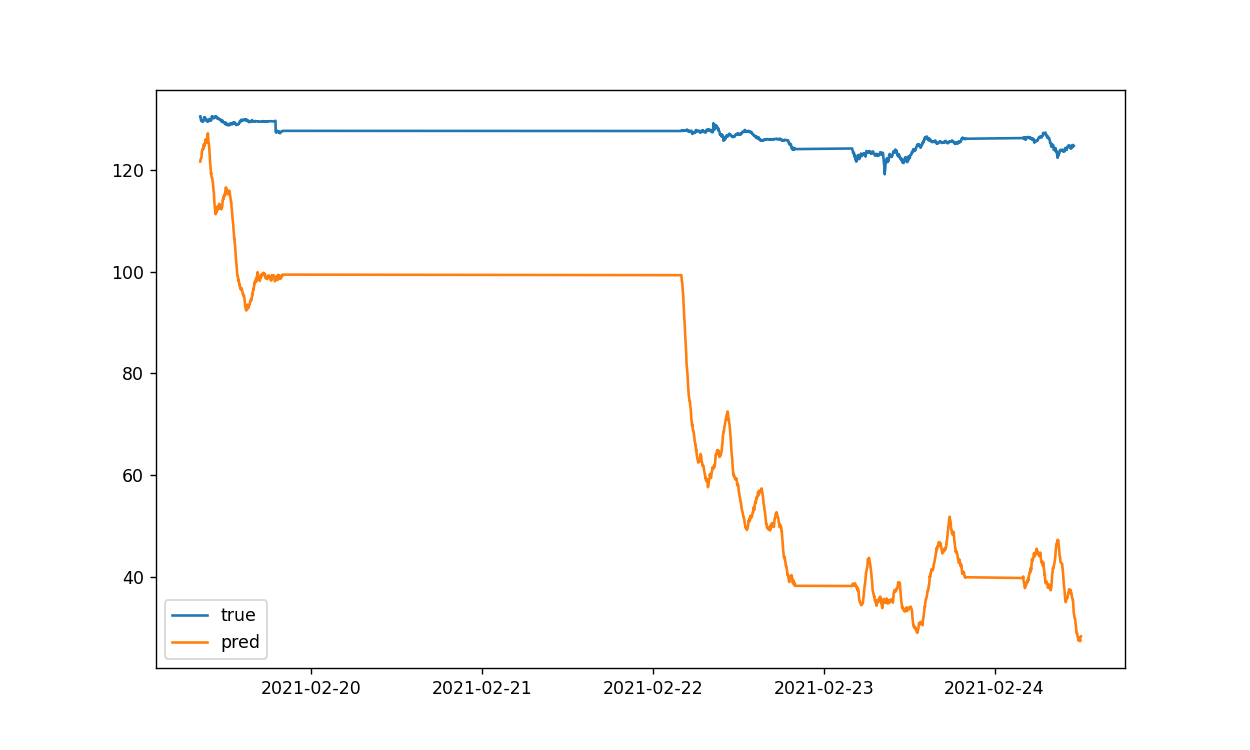

<function matplotlib.pyplot.show(block=None)>

In [67]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, y_hat_inv_frame['adj_close'])
plt.legend(['true','pred'])
plt.show

In [82]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

<IPython.core.display.Javascript object>


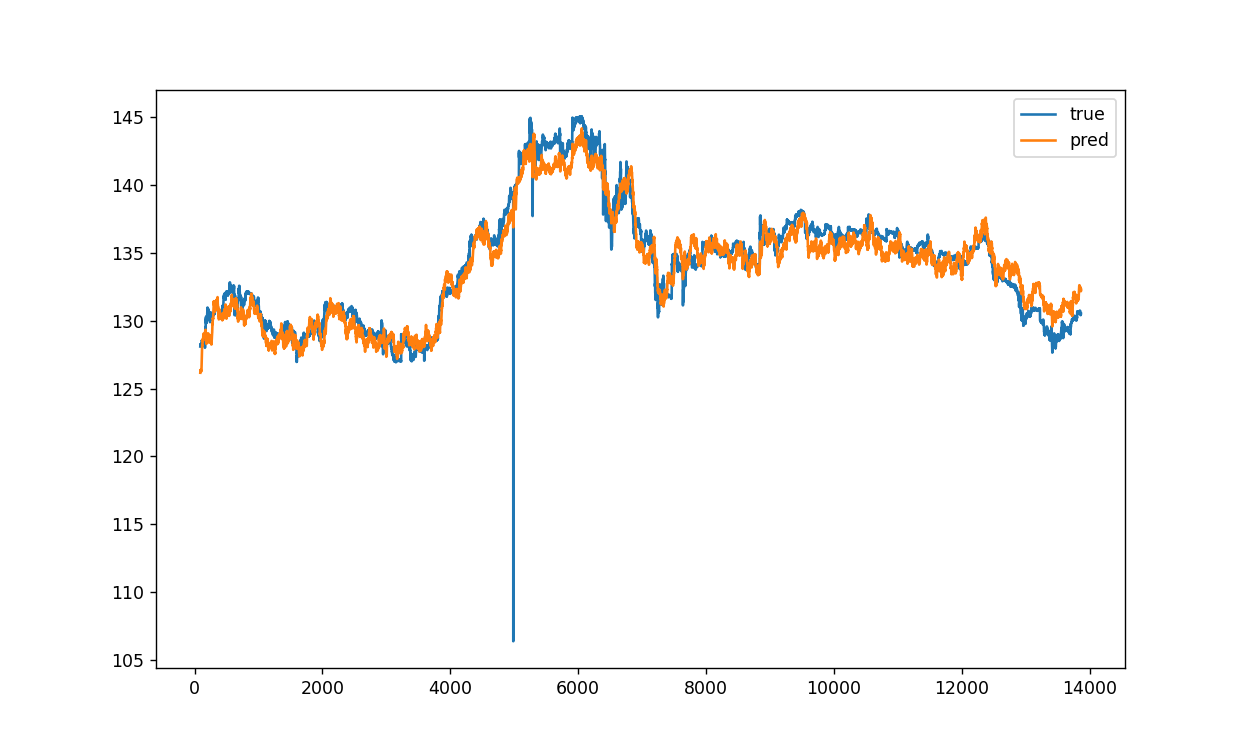

<function matplotlib.pyplot.show(block=None)>

In [83]:
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(train_scaled.index, train_close_vals[slow:])
plt.plot(train_scaled.index, y_hat_inv_frame_val['adj_close'])
plt.legend(['true','pred'])
plt.show

In [ ]:
def func_fit(position):
    print(position[0, 0])
    print(position[0, 1])
    
    
    svrRegressor = SVR(kernel='sigmoid', gamma = position[0,0], coef0 = position[0,1])
    svrRegressor.fit(X_train, y_train)
    y_train_pred = svrRegressor.predict(X_train)
    y_test_pred = svrRegressor.predict(X_test)
    mse_test =mean_squared_error(y_test, y_test_pred)
    mae_test =mean_absolute_error(y_test, y_test_pred)
    rmse_test = math.sqrt(mse_test)
    print('Optimizing the Parameters ..... C = {c}, Gamma={gamma}'.format(c=position[1], gamma=position[0]))
    mse_train =mean_squared_error(y_train, y_train_pred)
    rmse_train = math.sqrt(mse_train)
    #list(range(mse_f_train,rmse_f_train))
    retVal= [rmse_train, rmse_test] #Return a vector instead of single value. you can use the rmse_test and ignore rmse_train
    
    print('round something fitted')
    return retVal
    

In [ ]:
plt.rcParams['figure.figsize'] = [18, 10]

In [ ]:
from pyswarms.single.global_best import GlobalBestPSO


In [ ]:
lb = [10, 0.0001]
ub = [1000,0.1]
bounds = (lb, ub)
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds = bounds)
gamma_opt, C_opt = optimizer.optimize(func_fit, iters=10, verbose = True)

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
xgb.plot_importance(model_2, max_num_features = 50)
xgb.plot_tree(model_2)



In [ ]:
feature_important = model_2.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

In [ ]:
feature_dict = dict(zip(keys, values))

In [ ]:
my_keys = sorted(feature_dict, key=feature_dict.get, reverse=True)[:50]

In [ ]:
print(my_keys)

In [ ]:
pred_frame = pd.DataFrame(test_pred_2)

In [ ]:
#print(pred_frame.tail(5))

In [ ]:
X_numpy = X_train_scaled_new.to_numpy()
#print(type(X_numpy))

In [ ]:
from numpy import count_nonzero
sparsity = 1.0 - (count_nonzero(X_numpy) / X_numpy.size)
print(sparsity)

In [ ]:
#print(test_pred_2[-1])
#last class label
#plt.ylabel('BUY => 1, SELL => 0, HOLD => 2')
test_dates_list[-1:]

In [ ]:
print(type(pred_frame))

In [ ]:
#scaler_2.fit(test[cols_to_scale])
#test_scaled = scaler_2.transform(test[cols_to_scale])

In [ ]:
true_labels = y_test_scaled_new.to_numpy()
pred_labels = test_pred_2[:]

true_frame = pd.DataFrame(true_labels)
pred_frame_test = pd.DataFrame(pred_labels)

In [ ]:
true_frame

In [ ]:
pred_frame_test = pred_frame_test[:-30]
pred_frame_test

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_frame, pred_frame_test)

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(y_test_scaled_new[:-30], test_pred_2[:-30],display_labels=['up','down'],normalize='true')

In [ ]:
#test_scaled_preds = test_scaled_preds[90:]

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]


In [ ]:
up_list = pred_frame_test.index[pred_frame_test[0]==1].tolist()
down_list = pred_frame_test.index[pred_frame_test[0]==0].tolist()

In [ ]:
buy_list_true = pred_frame_test.index[true_frame[0]==1].tolist()
sell_list_true = pred_frame_test.index[true_frame[0]==0].tolist()

In [ ]:
plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, test_close_vals, 'g^', markevery=up_list)
plt.plot(test_dates_list, test_close_vals, 'rv', markevery=down_list)

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, test_close_vals, 'g^', markevery=buy_list_true)
plt.plot(test_dates_list, test_close_vals, 'rv', markevery=sell_list_true)

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(pred_frame_test)

In [ ]:
from sklearn.svm import SVR
tic = time.perf_counter()
reg = SVR()
reg.fit(X_train_scaled_new, y_train_scaled_new)
toc = time.perf_counter()

tic_toc = (toc - tic) / 60

In [ ]:
reg_pred = reg.predict(X_test_scaled_new)
#reg_score = reg.score(X_test_scaled_new, y_test_scaled_new)

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, y_test_scaled_new)
plt.plot(test_dates_list, reg_pred)
plt.legend(['true','pred'])
plt.show

In [ ]:
print('adj_close' in test_scaled.columns)

In [ ]:
test_scaled.drop('adj_close', inplace = True, axis= 1)

In [ ]:
print('adj_close' in test_scaled.columns)

In [ ]:
test_scaled['adj_close'] = reg_pred

In [ ]:
new = scaler_2.inverse_transform(test_scaled)

In [ ]:
this_new = pd.DataFrame(new, columns = test_scaled.columns)

In [ ]:
#print(test_scaled_preds)

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]


In [ ]:
plt.plot(test_dates_list, test_close_vals.values)
plt.plot(test_dates_list, this_new['adj_close'])
plt.legend(['true','pred'])
plt.show

In [ ]:
from sklearn.linear_model import SGDRegressor
sg_reg = SGDRegressor()
sg_reg.fit(X_train_scaled_new, y_train_scaled_new)

In [ ]:
sg_reg_pred = sg_reg.predict(X_test_scaled_new)



In [ ]:
test_scaled['adj_close'] = sg_reg_pred

new = scaler_2.inverse_transform(test_scaled)


In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, y_test_scaled_new)
plt.plot(test_dates_list, test_scaled['adj_close'])
plt.legend(['true','pred'])
plt.show

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 20)
knn_reg.fit(X_train_scaled_new, y_train_scaled_new)

In [ ]:
knn_reg_pred = knn_reg.predict(X_test_scaled_new)

In [ ]:
test_scaled['adj_close'] = knn_reg_pred
test_scaled_preds = scaler_2.inverse_transform(test_scaled)
these_preds = pd.DataFrame(test_scaled_preds)
test_scaled_preds = test_scaled_preds[90:]

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, y_test_scaled_new)
plt.plot(test_dates_list, knn_reg_pred)
plt.legend(['true','pred'])
plt.show